In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import seaborn as sns

In [2]:
data = pd.read_csv('EcommerceCustomers (3).csv')
data.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [3]:
data.shape

(500, 8)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
Email                   500 non-null object
Address                 500 non-null object
Avatar                  500 non-null object
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5), object(3)
memory usage: 25.4+ KB


# Compare Website vs App on impact to Yearly Spending

c:\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


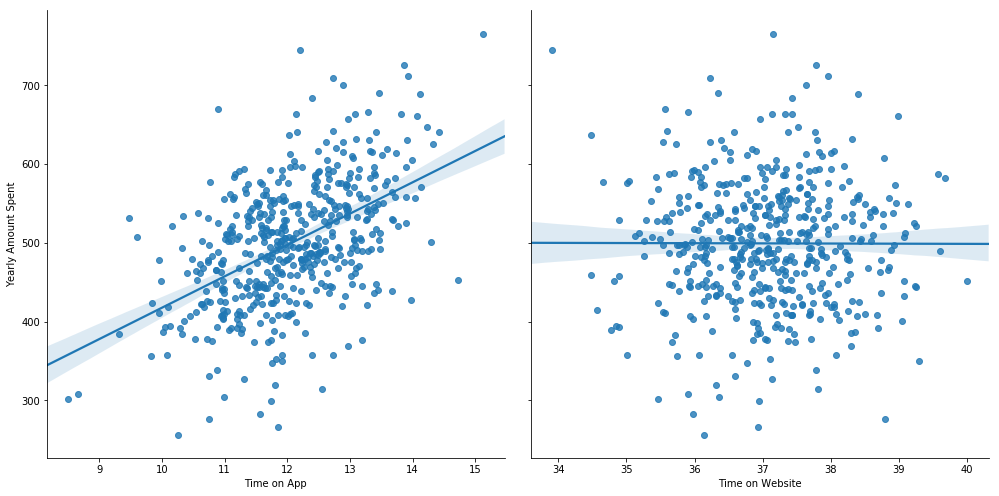

In [5]:
sns.pairplot(data,x_vars=['Time on App','Time on Website'],y_vars=['Yearly Amount Spent'],height=7,kind='reg')

# Use jointplot to create a 2D hex bin plot comparing Time on App and Length

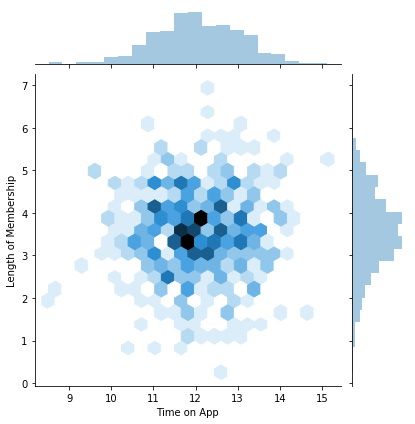

In [6]:
sns.jointplot(x='Time on App',y='Length of Membership',kind='hex',data=data)

# Explore relationships across the entire data set.

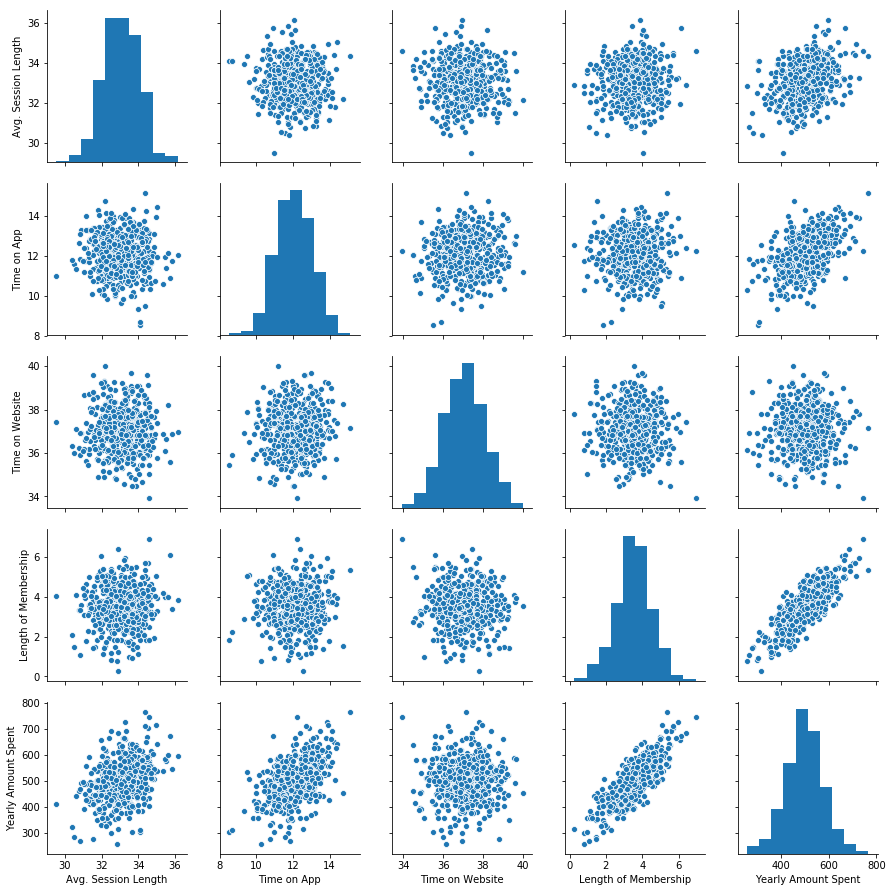

In [7]:
sns.pairplot(data)

# Create a linear model plot of  Yearly Amount Spent vs. Length of Membership.

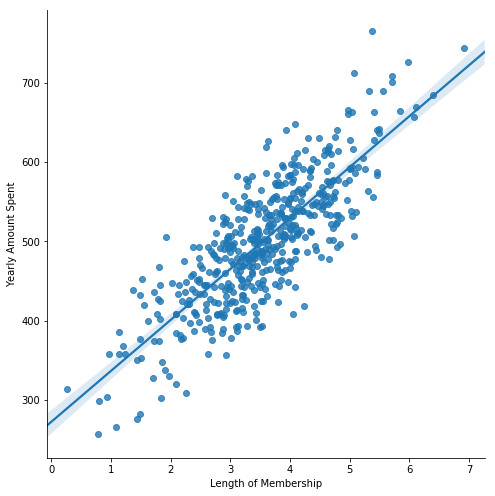

In [8]:
sns.pairplot(data,x_vars=['Length of Membership'],y_vars=['Yearly Amount Spent'],height=7,kind='reg')

# Training and Testing Data

Split the data into training and testing sets.

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = data[['Avg. Session Length','Time on App','Time on Website','Length of Membership']]
x
y  = data['Yearly Amount Spent']
y

0      587.951054
1      392.204933
2      487.547505
3      581.852344
4      599.406092
5      637.102448
6      521.572175
7      549.904146
8      570.200409
9      427.199385
10     492.606013
11     522.337405
12     408.640351
13     573.415867
14     470.452733
15     461.780742
16     457.847696
17     407.704548
18     452.315675
19     605.061039
20     534.705744
21     419.938775
22     436.515606
23     519.340989
24     700.917092
25     423.179992
26     619.895640
27     486.838935
28     529.537665
29     554.722084
          ...    
470    424.728774
471    541.049831
472    469.383146
473    444.545550
474    492.556834
475    535.321610
476    408.958336
477    487.555458
478    487.646232
479    402.167122
480    551.023002
481    497.389558
482    494.638610
483    479.247417
484    462.656519
485    515.502480
486    576.477607
487    357.857984
488    597.739879
489    327.377953
490    510.401388
491    510.501478
492    403.819520
493    627.603319
494    510

# Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101

In [11]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [12]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(350, 4)
(150, 4)
(350,)
(150,)



# Training the Model

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [16]:
print('Intercept : ',model.intercept_)

Intercept :  -1047.932782250237


In [17]:
print('Coefficients: ',model.coef_)

Coefficients:  [25.98154972 38.59015875  0.19040528 61.27909654]


# Predicting Test Data

In [18]:
y_pred = model.predict(X_test)
print(y_pred)

[456.44186104 402.72005312 409.2531539  591.4310343  590.01437275
 548.82396607 577.59737969 715.44428115 473.7893446  545.9211364
 337.8580314  500.38506697 552.93478041 409.6038964  765.52590754
 545.83973731 693.25969124 507.32416226 573.10533175 573.2076631
 397.44989709 555.0985107  458.19868141 482.66899911 559.2655959
 413.00946082 532.25727408 377.65464817 535.0209653  447.80070905
 595.54339577 667.14347072 511.96042791 573.30433971 505.02260887
 565.30254655 460.38785393 449.74727868 422.87193429 456.55615271
 598.10493696 449.64517443 615.34948995 511.88078685 504.37568058
 515.95249276 568.64597718 551.61444684 356.5552241  464.9759817
 481.66007708 534.2220025  256.28674001 505.30810714 520.01844434
 315.0298707  501.98080155 387.03842642 472.97419543 432.8704675
 539.79082198 590.03070739 752.86997652 558.27858232 523.71988382
 431.77690078 425.38411902 518.75571466 641.9667215  481.84855126
 549.69830187 380.93738919 555.18178277 403.43054276 472.52458887
 501.82927633 4

# Create a scatterplot of the real test values versus the predicted values.

Text(0,0.5,'Predict value of y')

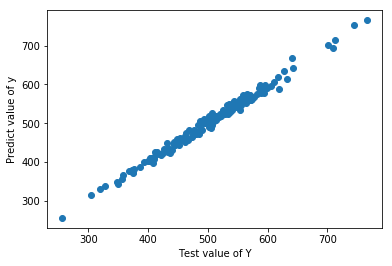

In [19]:
plt.scatter(Y_test,y_pred)
# plt.plot(Y_test,y_pred)
plt.xlabel('Test value of Y')
plt.ylabel('Predict value of y')

# Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [20]:
from sklearn import metrics
import numpy as np

In [21]:
print('Root Mean Squared Error : ',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))
print('Mean Squared Error : ',metrics.mean_squared_error(Y_test,y_pred))
print('Mean Absolute Error : ',metrics.mean_absolute_error(Y_test,y_pred))

Root Mean Squared Error :  8.933815066978628
Mean Squared Error :  79.81305165097434
Mean Absolute Error :  7.2281486534308295


c:\python36\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


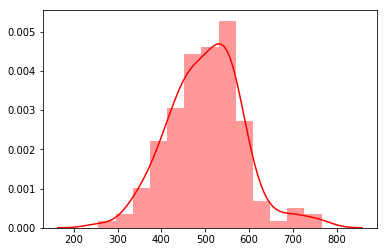

In [22]:
sns.distplot(y_pred,color='red')

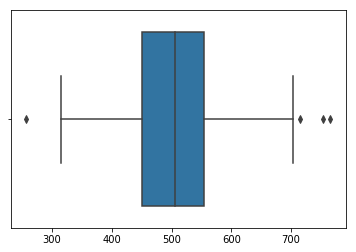

In [23]:
sns.boxplot(y_pred)